# Autoencoders Lab

## Objective

In this lab, we'll learn how to write an **_encoder_** and a **_decoder_**, and stack them into an **_Autoencoder_**. 

## The Data Set

For this lab, we'll be working with the MNIST dataset.  

## Getting Started: What are Autoencoders?

Autoencoders are a clever way of training two models together than can compress an image (or other data) down into a roughly equivalent representation in a lower-dimensional space (the **_Encoder_**), and then reconstruct the original image from that lower-dimensional representation.  At their heart, they're a compression technique.  However, they're not a _good_ compression technique, because they are **_lossy_**, meaning that some of the compressed information will be lost during the process--in the case of images, we can interpret this as the image being a bit lower quality after running through the autoencoder.  

Although autoencoders are not great at compression, they're still a useful tool in our Deep Learning toolbox, as they introduce us to the concept of **_Data Manifolds_**.  Although basic autoencoders aren't too useful, it turns out that more advanced versions of autoencoders have amazing uses for **_generative techniques_**, such as **_Denoising Autoencoders_** and **_Variational Autoencoders_**. Before we can learn to use the advanced methods, we'll need to get some practice and mastery with basic autoencoders.  

Run the cell below to import everything we'll need for this lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, UpSampling2D

Using TensorFlow backend.


## Creating Our First Autoencoder

An Autoencoder is made up of 2 parts--an **_Encoder_**, and a **_Decoder_**.  These two parts are mirror images of each other.

The **_encoder_** takes in some data, and outputs a representation of this data in a **_Z vector_**, which is the (generally equivalent) representation of the data in a lower dimensional space.  

the **_decoder_** takes in a Z vector, and outputs the original image the encoder was given.  It won't be _exactly_ perfect, since these models are lossy and lose some information during the compression stage, but if the model is well trained, it'll generally be pretty close.  

<img src='autoencoder_diagram.png'>

**_Note:_** In this lab, we're using a kind of Keras syntax that you probably haven't seen in labs thus far.  Instead of creating a `Sequential()` object and using `.add()` to add each successive layer that we want, we instead instantiate the individual layers that we want, and specify what that given layer is connected to.  Then, we create a `Model` object and specify the input and output layers.

To give you an example of this syntax so that you can get comfortable with it, we've provided the sample code for the first autoencoder in this lesson.  

Before we can build the autoencoder, we'll need to decide how many dimensions we want our z-vector to be, which will determine the dimensionality of our encoded data.  

In the cell below, set `encoding_dim` to 32. 

In [2]:
encoding_dim = 32

Now, take a minute to read the code in the cell below and get a feel for the syntax used for constructing this autoencoder.  Then, run the cell to create a basic autoencoder.  

In [3]:
input_img = Input(shape=(784,))
encoded_image_layer = Dense(encoding_dim, activation='relu')(input_img)
decoded_image_layer = Dense(784, activation='sigmoid')(encoded_image_layer)
autoencoder = Model(input_img, decoded_image_layer)

Now that we have the full autoencoder, we need to store the encoder and the decoder separately, so that we can use them one at a time once the model is trained.  We can do this by creating new Model objects, but referencing the layers from the model we created above. 

In the cell below:

* Create a `Model` and store it in the variable `encoder`.  The input for this model is `input_img`, and the output for this model is `encoded_image_layer`.  
* Create an `Input` layer and store it in `encoded_input`.  Set the `shape` parameter of this input layer to `(encoding_dim,)`
* Slice the last layer from our autoencoder's `.layers` attribute and store it in `decoder_layer`
* Create another `Model` object and store it in `decoder`.  The input of this model should be `encoded_input`, and the ouput should be `decoder_layer(encoded_input)`.

In [4]:
encoder = Model(input_img, encoded_image_layer)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

Now, that we've built our autoencoder and created separate encoder and decoder variables, we still need to compile our autoencoder model.  

In the cell below, `.compile()` our autoencoder.  Set the loss to `'binary_crossentropy'` and the optimizer to `'adadelta'`.  

(Unlike all the models from previous labs, we won't ask for any `metrics`, since it doesn't make sense for an autoencoder).

In [5]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adadelta')

## Getting our Training Data

We'll train our autoencoder on MNIST for this lab.  However, we do not need the labels, just the images.  

In the cell below, call `mnist.load_data()` to store our images in the appropriate variables.

In [6]:
(X_train, _), (X_test, _) = mnist.load_data()

We'll still need to reshape our data into vectors and normalize it.  In the cell below:

* Reshape the data inside `X_train` and `X_test` into vectors of size `784` (remember to include the number of samples in each as the first parameter in the `reshape` call.) Also cast the data in each to type `'float32'`.
* Normalize the values by dividing the data in each by `255.`

In [7]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
X_train /= 255.
X_test /= 255.

Now, we have a compiled model and our data is reshaped and normalized.  All that is left is to fit the model!

In the cell below, `.fit()` the autoencoder.  

* Pass in `X_train` as the first and second arguments, since the images will act as both our data and our labels.
* Train the model for `50` epochs.
* Set a batch size of `256`.
* Set the `shuffle` parameter to `True`.
* Pass in `(X_test, X_test)` as our `validation_data`.

In [8]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.3574 - val_loss: 0.2717
Epoch 2/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.2654 - val_loss: 0.2557
Epoch 3/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.2446 - val_loss: 0.2312
Epoch 4/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.2224 - val_loss: 0.2118
Epoch 5/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.2061 - val_loss: 0.1981
Epoch 6/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1945 - val_loss: 0.1883
Epoch 7/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1858 - val_loss: 0.1806
Epoch 8/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1787 - val_loss: 0.1742
Epoch 9/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1728 - val_loss: 0.1687
Epoch

Now that we've trained our autoencoder, let's make use the the encoder and decoder separately, and then visualize our results!

In the cell below:

* Use the `encoder` object to create an encoded representation of `X_test` (use the `.predict()` method!)
* Use the `decoder` object to decode the `encoded_imgs` we just created.

In [9]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

Great! Now, runt he cell below to visualize a a comparison of original images and their encoded/decoded counterparts.  Do you detect much degradation in the images?

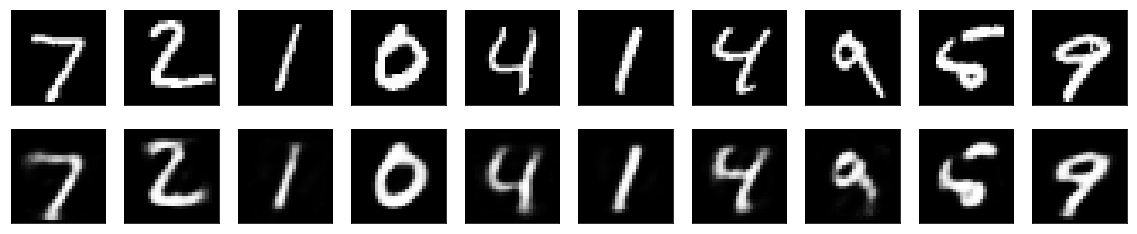

In [10]:
 # use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Building a Deeper Autoencoder

The model we just built was the simplest possible version of an autoencoder.  It did pretty well considering how small it is, but it still definitely lost some information and degraded the images during the process.  Let's build a deeper model and see how this affects our image degradation!

In the cell below, complete the following layers:

* `input_img` should be an `Input` layer of shape `(784,)`
* `encoded_1` should be a Dense layer with 128 neurons, relu activation, and should be connected to `input_img`
* `encoded_2` should be a Dense layer with 64 neurons, relu activation, and should be connected to `encoded_1`
* `encoded_3` should be a Dense layer with 32 neurons, relu activation, and should be connected to `encoded_2`
* `decoded_1` should be a Dense layer with 64 neurons, relu activation, and should be connected to `encoded_3`
* `decoded_2` should be a Dense layer with 128 neurons, relu activation, and should be connected to `decoded_1`
* `decoded_3` should be a Dense layer with 784 neurons, sigmoid activation, and should be connected to `decoded_2`

In [11]:
input_img = Input(shape=(784,))
encoded_1 = Dense(128, activation='relu')(input_img)
encoded_2 = Dense(64, activation='relu')(encoded_1)
encoded_3 = Dense(32, activation='relu')(encoded_2)

decoded_1 = Dense(64, activation='relu')(encoded_3)
decoded_2 = Dense(128, activation='relu')(decoded_1)
decoded_3 = Dense(784, activation='sigmoid')(decoded_2)

Now, create a `Model` object and pass in the first and last layers: `input_img` and `decoded_3`.

In [15]:
deeper_autoencoder = Model(input_img, decoded_3)

Now that we've created our Deep Autoencoder, we'll still need to store references to our Deep Encoder and Deep Decoder separately, so that we can use them individually when needed.  

In the cell below:

* Store a `Model()` in `deep_encoder`.  In this model, pass in our `input_img` and the last encoder layer  of our deep autoencoder, `encoder_3`.
* Store an `Input` layer inside of `deep_encoded_input`, and set the `shape` parameter equal to `(encoding_dim,)`
* Store the decoder layers  from `deep_autoencoder` inside of `deep_decoder_layer`  variables with the appropriate numbers--`deep_decoder_layer_1` should correspond to `deep_autoencoder.layers[-3]`, `deep_decoder_layer_2` should correspond to `deep_autoencoder.layers[-2]`, and `deep_decoder_layer_3` should correspond to `deep_autoencoder.layers[-1]`. 
* Store another `Model()` unit, this time inside of `deep_decoder`.  Pass in `deep_encoded_input` and `decoder_layer(deep_encoded_input)`

In [16]:
deep_encoder = Model(input_img, encoded_3)
deep_encoded_input = Input(shape=(encoding_dim,))
deep_decoder_layer_1 = deeper_autoencoder.layers[-3]
deep_decoder_layer_2 = deeper_autoencoder.layers[-2]
deep_decoder_layer_3 = deeper_autoencoder.layers[-1]
deep_decoder = Model(deep_encoded_input, decoder_layer(deep_encoded_input))

Now, compile the model with the same parameters we did before. 

In [17]:
deeper_autoencoder.compile(loss='binary_crossentropy', optimizer='adadelta')

Now, let's fit our Deep Autoencoder. When you fit it this time, set the following parameters:
* `epochs=100`
* `batch_size=256`
* `shuffle=True`
* `validation_data=(X_test, X_test)`

Don't forget to pass in `X_train` as the first two positional arguments!

In [18]:
deeper_autoencoder.fit(X_train, X_train, epochs=100, 
                       batch_size=256, shuffle=True, 
                       validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.3461 - val_loss: 0.2628
Epoch 2/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.2580 - val_loss: 0.2533
Epoch 3/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.2451 - val_loss: 0.2302
Epoch 4/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.2188 - val_loss: 0.2107
Epoch 5/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.2059 - val_loss: 0.1982
Epoch 6/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.1947 - val_loss: 0.1889
Epoch 7/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1863 - val_loss: 0.1813
Epoch 8/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1792 - val_loss: 0.1743
Epoch 9/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1723 - val_loss: 0.1

60000/60000 [==============================] - 4s 64us/step - loss: 0.1026 - val_loss: 0.1017
Epoch 78/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.1024 - val_loss: 0.1030
Epoch 79/100
60000/60000 [==============================] - 4s 58us/step - loss: 0.1022 - val_loss: 0.1020
Epoch 80/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1020 - val_loss: 0.1011
Epoch 81/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1019 - val_loss: 0.1004
Epoch 82/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1017 - val_loss: 0.1020
Epoch 83/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1015 - val_loss: 0.1001
Epoch 84/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1015 - val_loss: 0.0994
Epoch 85/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1011 - val_loss: 0.1009
Epoch 86/100
60000/60000 [========================

Now, let's encode and then decode the data in `X_test` with our Deep Autonencoder, so that we can reuse our visualization code and compare our decoded images with the original images.

In the cell below, encode and then decode the images 

In [21]:
deep_encoded_imgs = deep_encoder.predict(X_test)
deep_decoded_imgs  = deep_decoder.predict(deep_encoded_imgs)

Now, run the cell below to visualize our results.

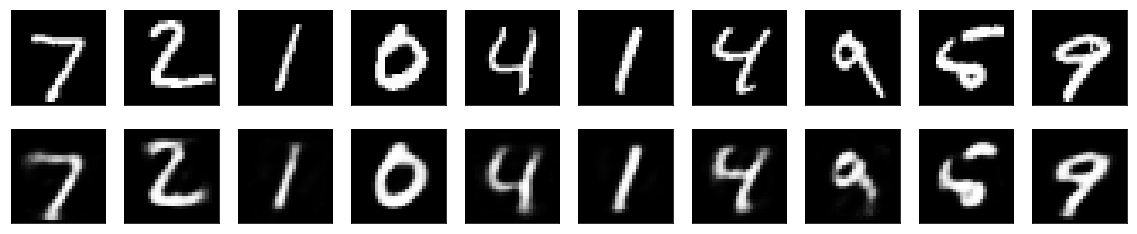

In [22]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

There still seems to be a little information loss in the form of image degradation, but the results are clearly better than the simple encoder we built before. 

## Bonus: Convolutional Autoencoders (Optional, GPU recommended)

The best autoencoders make use of Convolutional layers.  We've included the following code to build a Deep Convolutional Autoencoder. However, the training time on this model will be quite long.  

We've provided the example code to build the model.  However, we haven't provided the code for storing the encoder and decoder portions separately, or the code to compile and fit the model.  If you're up for a challenge, and don't mind a long run time, try to get the Deep Convolutional Autoencoder working below!

### The Architecture

If you read the code of the model below, you'll probably notice that the encoder portion looks fairly straightforward--the architecture is in line with what you would expect from a traditional CNN model--Conv2d layers with relu activations, followed by MaxPooling layers to reduce dimensionality.  However, in the decoder, you may have noticed a layer type we haven't encountered before--an **_UpSampling2D_** layer! This isn't as confusing as it looks--an upsampling layer is essentially the opposite of a MaxPooling layer. Whereas MaxPooling reduces our dimensionality section by section using a filter, Upsampling increases it!

In [ ]:
conv_input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

conv_encoder_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv_input_img)
conv_encoder_2 = MaxPooling2D((2, 2), padding='same')(conv_encoder_1)
conv_encoder_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv_encoder_2)
conv_encoder_4 = MaxPooling2D((2, 2), padding='same')(conv_encoder_3)
conv_encoder_5 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv_encoder_4)
conv_encoded = MaxPooling2D((2, 2), padding='same')(conv_encoder_5)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

conv_decoder_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv_encoded)
conv_decoder_2 = UpSampling2D((2, 2))(conv_decoder_1)
conv_decoder_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv_decoder_2)
conv_decoder_4 = UpSampling2D((2, 2))(conv_decoder_3)
conv_decoder_5 = Conv2D(16, (3, 3), activation='relu')(conv_decoder_4)
conv_decoder_6 = UpSampling2D((2, 2))(conv_decoder_5)
conv_decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv_decoder_6)

conv_autoencoder = Model(conv_input_img, conv_decoded)
conv_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## The Data

Recall that we reshaped our data to a vector since we were working with Dense layers in the previous models.  This won't work for a Convolutional Autoencoder, since the `Conv2D` layers will expect 2 dimensional images as inputs. 

The easiest option for us here is to just reimport the data and store it separately.

In the cell below, import the data using the `mnist` module we imported above.  Normalize the data by dividing by `255.` (you'll need to use numpy for this), and reshape it from it's current shape to `(28, 28, 1)`.

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')
X_train = np.divide(X_train, 255.)
X_test = np.divide(X_test, 255.)

## The Remaining Steps

In order to complete this optional section, you'll still need to:

* Store the encoder and the decoder in separate variables.
* Compile and train the model.
* Encode and then decode the images in `X_test`
* Reuse our visualization code to compare the output with the original images!

**_NOTE:_** You've been warned--this will likely take a very long time to train on a CPU.  If you don't have a GPU to train on, this will take a while!

Try to complete the steps mentioned above and train your very own Deep Convolutional Autoencoder!

## Sources

[Keras Blog--Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)